In [3]:
pip install tensorflow keras numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the IMDB dataset
print("Loading the dataset...")
df = pd.read_excel('IMDB Dataset.xlsx', engine='openpyxl')
print("Dataset loaded successfully.")
print("Dataset summary:")

# Display a summary of the dataset
print(df.info())  

# Display the few of the dataset rows
print(df.head())

Loading the dataset...
Dataset loaded successfully.
Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [11]:
# Preprocess the dataset
print("Preprocessing the text data...")
def preprocess_text(text):
    return text.lower().replace('<br />', ' ')

df['review'] = df['review'].apply(preprocess_text)
print("Text data preprocessing completed.")

# Display first few rows to show preprocessing results
print(df.head())  

Preprocessing the text data...
Text data preprocessing completed.
                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production.   the filming t...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive


In [21]:
# Tokenize the text
print("Tokenizing the text data...")
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
print("Text data tokenization completed.")
print("First 5 tokenized sequences:")

# Display the first 5 tokenized sequences
print(sequences[:5])  

Tokenizing the text data...
Text data tokenization completed.
First 5 tokenized sequences:
[[27, 4, 1, 79, 2102, 45, 1072, 12, 100, 147, 39, 307, 3184, 398, 474, 26, 3195, 33, 23, 203, 14, 11, 6, 621, 48, 596, 16, 68, 7, 7, 1, 86, 148, 12, 3241, 68, 42, 3184, 13, 92, 5398, 2, 134, 4, 570, 60, 268, 8, 203, 36, 1, 661, 139, 1740, 68, 11, 6, 21, 3, 119, 15, 1, 7888, 2333, 38, 11, 119, 2595, 54, 5911, 16, 5510, 5, 1479, 376, 38, 570, 92, 6, 3804, 8, 1, 360, 356, 4, 1, 661, 7, 7, 9, 6, 433, 3184, 14, 12, 6, 1, 358, 5, 1, 6813, 2538, 1064, 9, 2711, 1421, 20, 538, 32, 4636, 2468, 4, 1, 1208, 117, 29, 1, 7017, 25, 2970, 2, 391, 34, 6, 21, 299, 20, 1, 4910, 7364, 538, 6, 344, 5, 106, 8161, 5050, 7889, 2453, 2, 51, 34, 327, 9106, 7365, 2, 8697, 23, 110, 225, 243, 7, 7, 10, 58, 131, 1, 280, 1324, 4, 1, 119, 6, 693, 5, 1, 192, 12, 9, 269, 117, 79, 276, 589, 3024, 834, 180, 1320, 4161, 15, 2523, 1243, 834, 1443, 834, 887, 3184, 149, 954, 183, 1, 86, 398, 10, 123, 210, 3241, 68, 14, 34, 1637, 9, 13,

In [22]:
# Pad the sequences
print("Padding the sequences...")
max_len = 200
data = pad_sequences(sequences, maxlen=max_len)
print("Sequences padding completed.")
print("First 5 padded sequences:")

# Display the first 5 padded sequences
print(data[:5])  

Padding the sequences...
Sequences padding completed.
First 5 padded sequences:
[[  12    6    1  358    5    1 6813 2538 1064    9 2711 1421   20  538
    32 4636 2468    4    1 1208  117   29    1 7017   25 2970    2  391
    34    6   21  299   20    1 4910 7364  538    6  344    5  106 8161
  5050 7889 2453    2   51   34  327 9106 7365    2 8697   23  110  225
   243    7    7   10   58  131    1  280 1324    4    1  119    6  693
     5    1  192   12    9  269  117   79  276  589 3024  834  180 1320
  4161   15 2523 1243  834 1443  834  887 3184  149  954  183    1   86
   398   10  123  210 3241   68   14   34 1637    9   13 2239   10  413
   131   10   13 1592   15    9   18   14   10  287   51   10 1417    3
  1280   15 3184    2  189    5    1  299 2046    4 2150  570   21   39
   570   18 7658 7154 5010   26 2983   41   15    3 6904  504   20  642
     2   76  243   16    9   69 7598  651  710 6904  109  662   82 1208
   693    5   65  574    4  920 2021   38 1208  559  147

In [23]:
# Encode the labels
print("Encoding the labels...")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
labels = df['sentiment'].values
print("Labels encoding completed.")
print("First 5 encoded labels:")

# Display the first 5 encoded labels
print(labels[:5])  

Encoding the labels...
Labels encoding completed.
First 5 encoded labels:
[1 1 1 0 1]


In [24]:
# Split the dataset into training and testing sets
print("Splitting the dataset into training and testing sets...")
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Dataset splitting completed.")
print(f'Training set size: {x_train.shape[0]} samples')
print(f'Testing set size: {x_test.shape[0]} samples')

Splitting the dataset into training and testing sets...
Dataset splitting completed.
Training set size: 40000 samples
Testing set size: 10000 samples


In [25]:
# Build the model
print("Building the model...")
model = Sequential([
    Embedding(10000, 128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
print("Model built successfully.")

# Display the model summary
print(model.summary())

Building the model...
Model built successfully.


C:\Users\DHRUVI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
# Compile the model
print("Compiling the model...")
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("Model compiled successfully.")

Compiling the model...
Model compiled successfully.


In [27]:
# Train the model and save the history
print("Training the model...")
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=(x_test, y_test))
print("Model training completed.")
print("Training history (first epoch):")
print({k: v[0] for k, v in history.history.items()})

Training the model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 159ms/step - accuracy: 0.7372 - loss: 0.5140 - val_accuracy: 0.8551 - val_loss: 0.3514
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.8614 - loss: 0.3397 - val_accuracy: 0.8220 - val_loss: 0.3978
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - accuracy: 0.8844 - loss: 0.2901 - val_accuracy: 0.8684 - val_loss: 0.3388
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 172ms/step - accuracy: 0.8913 - loss: 0.2720 - val_accuracy: 0.8655 - val_loss: 0.3364
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.9110 - loss: 0.2346 - val_accuracy: 0.8816 - val_loss: 0.3061
Model training completed.
Training history (first epoch):
{'accuracy': 0.7877749800682068, 'loss': 0.4534296989440918, 'val_accuracy': 0.8550999760627747, 'val_loss': 0.3513534665107727}


In [30]:
# Evaluate the model
print("Evaluating the model...")
score, acc = model.evaluate(x_test, y_test, batch_size=64)
print(f'Test score: {score:.4f}')
print(f'Test accuracy: {acc:.4f}')

Evaluating the model...
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8808 - loss: 0.3043
Test score: 0.3061
Test accuracy: 0.8816


In [33]:
# Predict the number of positive and negative reviews
print("Predicting the number of positive and negative reviews...")
y_pred = (model.predict(x_test) > 0.5).astype("int32")
positive_reviews = np.sum(y_pred)
negative_reviews = len(y_pred) - positive_reviews
print(f'Number of positive reviews: {positive_reviews}')
print(f'Number of negative reviews: {negative_reviews}')

Predicting the number of positive and negative reviews...
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
Number of positive reviews: 4963
Number of negative reviews: 5037


Plotting training and validation accuracy and loss values...


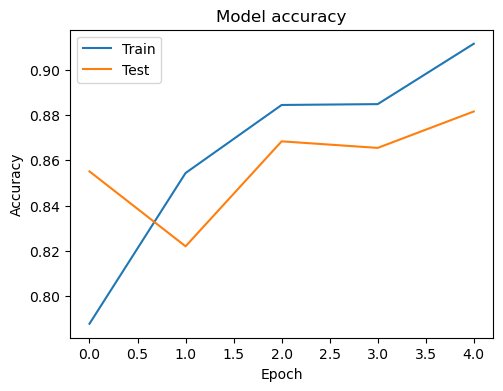

In [34]:
# Plot training & validation accuracy values
print("Plotting training and validation accuracy and loss values...")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

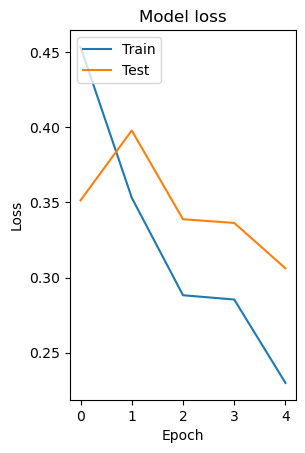

Training and validation accuracy and loss values plotted.


In [35]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
print("Training and validation accuracy and loss values plotted.")

Generating confusion matrix...
Plotting confusion matrix...


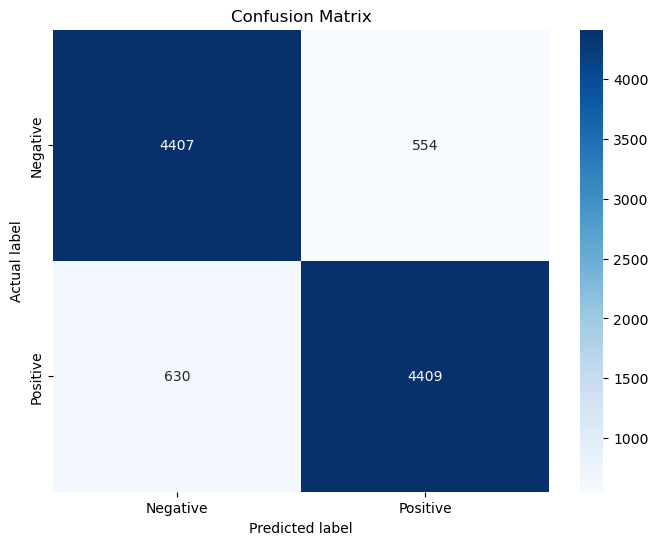

Confusion matrix plotted.


In [37]:
# Generate confusion matrix
print("Generating confusion matrix...")
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
print("Plotting confusion matrix...")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("Confusion matrix plotted.")

Plotting the distribution of positive and negative reviews...


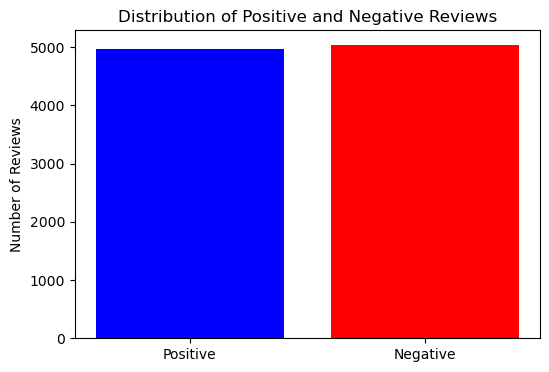

Distribution of positive and negative reviews plotted.


In [38]:
# Plot the distribution of positive and negative reviews
print("Plotting the distribution of positive and negative reviews...")
plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative'], [positive_reviews, negative_reviews], color=['blue', 'red'])
plt.title('Distribution of Positive and Negative Reviews')
plt.ylabel('Number of Reviews')
plt.show()
print("Distribution of positive and negative reviews plotted.")